# Introducción

## 1. Importando módulos y datos

### 1.1. Importar módulos

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

### 1.3. Detalles del listado de viviendas

In [4]:
print(os.listdir("input"))

['calendar.csv', 'detailed_listings.csv', 'detailed_reviews.csv', 'listings.csv', 'neighbourhoods.csv', 'neighbourhoods.geojson', 'reviews.csv']


In [5]:
listings = pd.read_csv(r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\input\listings.csv')
detailed_listings = pd.read_csv(r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\input\detailed_listings.csv')

In [6]:
listings.shape, detailed_listings.shape

((7783, 18), (7783, 75))

In [7]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [8]:
detailed_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

El archivo detailed_listings contiene un total de 76 variables. No vamos a usar todos estos, sino que juntaremos selectivamente una serie de variables que parecen útiles para este EDA.

In [9]:
print(listings.head())

       id                                               name  host_id  \
0   96033  Rental unit in Málaga · ★4.62 · 2 bedrooms · 2...   510467   
1  166473  Rental unit in Málaga · ★4.73 · 1 bedroom · 4 ...   793360   
2  212845  Rental unit in Málaga · ★4.81 · 1 bedroom · 2 ...   617998   
3  330760  Townhouse in Málaga · ★4.50 · 1 bedroom · 1 be...  1687526   
4  340024  Rental unit in Málaga · ★4.83 · 1 bedroom · 1 ...  1725690   

  host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0    Rafael                  NaN          Este  36.720310  -4.356270   
1      Fred                  NaN          Este  36.720310  -4.361080   
2     Valle                  NaN          Este  36.726070  -4.363830   
3     Mayte                  NaN        Centro  36.729786  -4.413462   
4    Carlos                  NaN        Centro  36.728130  -4.414220   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   53.0               3           

In [10]:
print(detailed_listings.head())

       id                          listing_url       scrape_id last_scraped  \
0   96033   https://www.airbnb.com/rooms/96033  20231231043937   2023-12-31   
1  166473  https://www.airbnb.com/rooms/166473  20231231043937   2023-12-31   
2  212845  https://www.airbnb.com/rooms/212845  20231231043937   2023-12-31   
3  330760  https://www.airbnb.com/rooms/330760  20231231043937   2023-12-31   
4  340024  https://www.airbnb.com/rooms/340024  20231231043937   2023-12-31   

        source                                               name  \
0  city scrape  Rental unit in Málaga · ★4.62 · 2 bedrooms · 2...   
1  city scrape  Rental unit in Málaga · ★4.73 · 1 bedroom · 4 ...   
2  city scrape  Rental unit in Málaga · ★4.81 · 1 bedroom · 2 ...   
3  city scrape  Townhouse in Málaga · ★4.50 · 1 bedroom · 1 be...   
4  city scrape  Rental unit in Málaga · ★4.83 · 1 bedroom · 1 ...   

   description                              neighborhood_overview  \
0          NaN  A 200 metros de las playa

In [11]:
def print_columns_with_nulls(df):
    null_columns = df.columns[df.isnull().any()]
    print(df[null_columns].isnull().sum())

print_columns_with_nulls(detailed_listings)
print_columns_with_nulls(listings)

description                     7783
neighborhood_overview           4020
host_location                   1782
host_about                      3287
host_response_time               625
host_response_rate               625
host_acceptance_rate             330
host_is_superhost                 35
host_neighbourhood              7052
neighbourhood                   4020
neighbourhood_group_cleansed    7783
bathrooms                       7783
bedrooms                        7783
beds                              86
price                             64
calendar_updated                7783
has_availability                  64
first_review                     927
last_review                      927
review_scores_rating             926
review_scores_accuracy           926
review_scores_cleanliness        926
review_scores_checkin            926
review_scores_communication      926
review_scores_location           926
review_scores_value              926
license                          135
r

In [12]:
columnas_todo_nulos_detailed_listings = detailed_listings.columns[detailed_listings.isnull().sum(axis=0) == 7783]
detailed_listings.drop(columns=columnas_todo_nulos_detailed_listings, inplace=True)

In [13]:
detailed_listings.shape

(7783, 70)

In [14]:
columnas_todo_nulos_listings = listings.columns[listings.isnull().sum(axis=0) == 7783]
listings.drop(columns=columnas_todo_nulos_listings, inplace=True)

In [15]:
listings.shape

(7783, 17)

Hemos borrado todas las columnas que tenían todos los valores nulos en ambos datasets.

Fusionamos ambos datasets por las columnas target atendiendo a "id"

In [16]:
print(listings['id'].dtype)

int64


In [17]:
print(detailed_listings['id'].dtype)

int64


In [18]:
id_detailed_listings = detailed_listings['id'].unique()
id_listings = listings['id'].unique()
son_iguales = set(id_detailed_listings) == set(id_listings)
print("Los ID de ambos datasets son exactamente iguales:", son_iguales)

Los ID de ambos datasets son exactamente iguales: True


In [19]:
target_columns = ["id", "property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]

In [20]:
short_detailed_listings = detailed_listings[target_columns]

In [22]:
listings = pd.merge(listings, short_detailed_listings, on='id', how='left')
df_listings = listings
df_listings.to_csv('df_listings.csv', index=False)

In [24]:
listings = pd.merge(listings, short_detailed_listings, on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7783 entries, 0 to 7782
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7783 non-null   int64  
 1   name                            7783 non-null   object 
 2   host_id                         7783 non-null   int64  
 3   host_name                       7783 non-null   object 
 4   neighbourhood                   7783 non-null   object 
 5   latitude                        7783 non-null   float64
 6   longitude                       7783 non-null   float64
 7   room_type                       7783 non-null   object 
 8   price                           7719 non-null   float64
 9   minimum_nights                  7783 non-null   int64  
 10  number_of_reviews               7783 non-null   int64  
 11  last_review                     6856 non-null   object 
 12  reviews_per_month               68

Mostramos el encabezado del marco de datos con el que vamos a trabajar.

In [25]:
listings.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
0,96033,Rental unit in Málaga · ★4.62 · 2 bedrooms · 2...,510467,Rafael,Este,36.720310,-4.356270,Entire home/apt,53.0,3,...,4.71,4.92,4.87,4.62,180,https://www.airbnb.com/rooms/96033,f,¡Hola! Gracias por acercarte a nosotros y enca...,within an hour,100%
1,166473,Rental unit in Málaga · ★4.73 · 1 bedroom · 4 ...,793360,Fred,Este,36.720310,-4.361080,Private room,19.0,5,...,4.61,4.91,4.82,4.73,365,https://www.airbnb.com/rooms/166473,t,"Hi All, my name is Fred and I am half Swedish ...",within a few hours,100%
2,212845,Rental unit in Málaga · ★4.81 · 1 bedroom · 2 ...,617998,Valle,Este,36.726070,-4.363830,Shared room,43.0,2,...,4.79,4.88,4.93,4.81,90,https://www.airbnb.com/rooms/212845,f,Soy mujer de 66 años activa y viajera. Tengo d...,within a few hours,100%
3,330760,Townhouse in Málaga · ★4.50 · 1 bedroom · 1 be...,1687526,Mayte,Centro,36.729786,-4.413462,Private room,44.0,1,...,4.61,4.58,4.69,4.50,1125,https://www.airbnb.com/rooms/330760,f,"Dear guest,\nMy name is Mayte Moreno Higgins. ...",within an hour,100%
4,340024,Rental unit in Málaga · ★4.83 · 1 bedroom · 1 ...,1725690,Carlos,Centro,36.728130,-4.414220,Entire home/apt,61.0,3,...,4.90,4.83,4.87,4.83,1125,https://www.airbnb.com/rooms/340024,t,En cuanto a la actividad para el alquiler del ...,within an hour,100%


In [26]:
print_columns_with_nulls(listings)

price                            64
last_review                     927
reviews_per_month               927
license                         135
first_review                    927
review_scores_value             926
review_scores_cleanliness       926
review_scores_location          926
review_scores_accuracy          926
review_scores_communication     926
review_scores_checkin           926
review_scores_rating            926
host_is_superhost                35
host_about                     3287
host_response_time              625
host_response_rate              625
dtype: int64


# 2. Análisis exploratorio

## 2.1. Vecindario

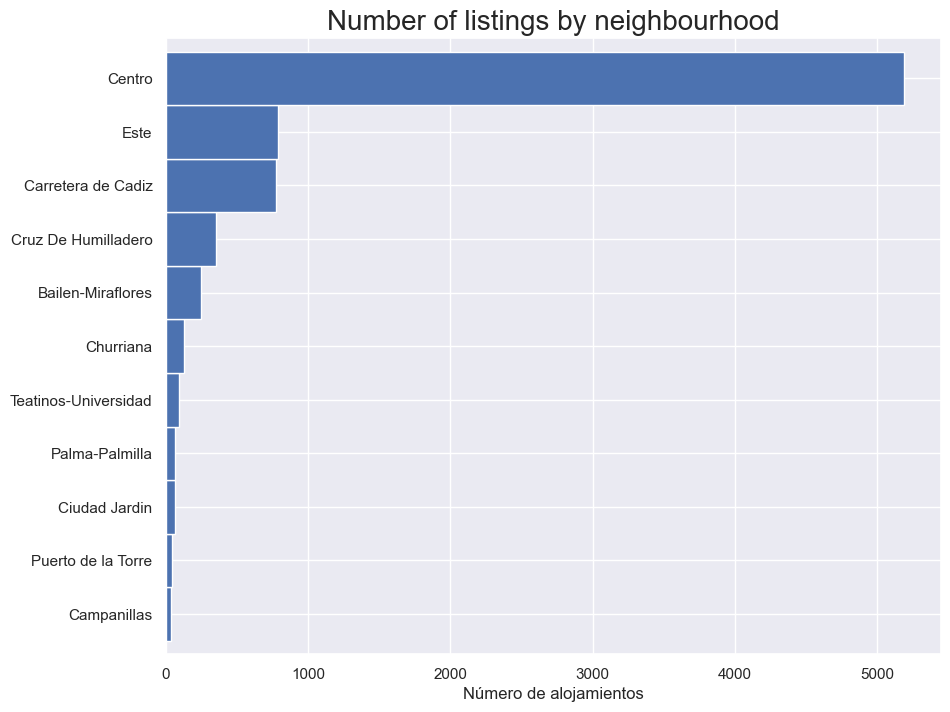

In [27]:
feq=listings['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Número de alojamientos', fontsize=12)
plt.show()

Se puede ver que la mayoría de los listados están en el centro de la ciudad.

In [28]:
lats2023 = listings['latitude'].tolist()
lons2023 = listings['longitude'].tolist()
locations = list(zip(lats2023, lons2023))

map1 = folium.Map(location=[36.72077, -4.42104], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

## 2.2. Tipos de propiedades y habitaciones

### 2.2.1. Tipos de habitaciones

In [29]:
freq = listings['room_type'].value_counts().sort_values(ascending=True)

freq_df = freq.reset_index()
freq_df.columns = ['room_type', 'count']

fig = px.bar(freq_df, y='room_type', x='count', orientation='h', color='room_type', height=600, width=1200, title='Frecuencia de Tipos de Habitación')

fig.show()

### 2.2.2. Tipos de propiedades


En el conjunto de datos, encontramos muchos tipos de propiedades diferentes.

In [30]:
listings.property_type.unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Shared room in rental unit', 'Private room in townhouse',
       'Private room in home', 'Entire loft', 'Entire condo',
       'Entire home', 'Entire serviced apartment', 'Entire guest suite',
       'Entire cottage', 'Entire townhouse', 'Entire chalet',
       'Private room in condo', 'Room in boutique hotel', 'Entire villa',
       'Room in serviced apartment', 'Private room in guesthouse',
       'Entire guesthouse', 'Floor', 'Camper/RV', 'Tiny home',
       'Room in aparthotel', 'Entire vacation home',
       'Private room in guest suite', 'Private room',
       'Shared room in earthen home', 'Private room in loft',
       'Private room in chalet', 'Private room in hostel',
       'Private room in casa particular', 'Entire cabin',
       'Private room in serviced apartment', 'Entire place',
       'Shared room in chalet', 'Private room in bed and breakfast',
       'Casa particular', 'Dome', 'Private room in villa'

Sin embargo, muchos de esos tipos de propiedades tienen muy pocos listados en Málaga. En la figura a continuación, solo mostramos tipos de propiedades con al menos 100 listados. Como podemos ver, la gran mayoría de las propiedades en Málaga son apartamentos.

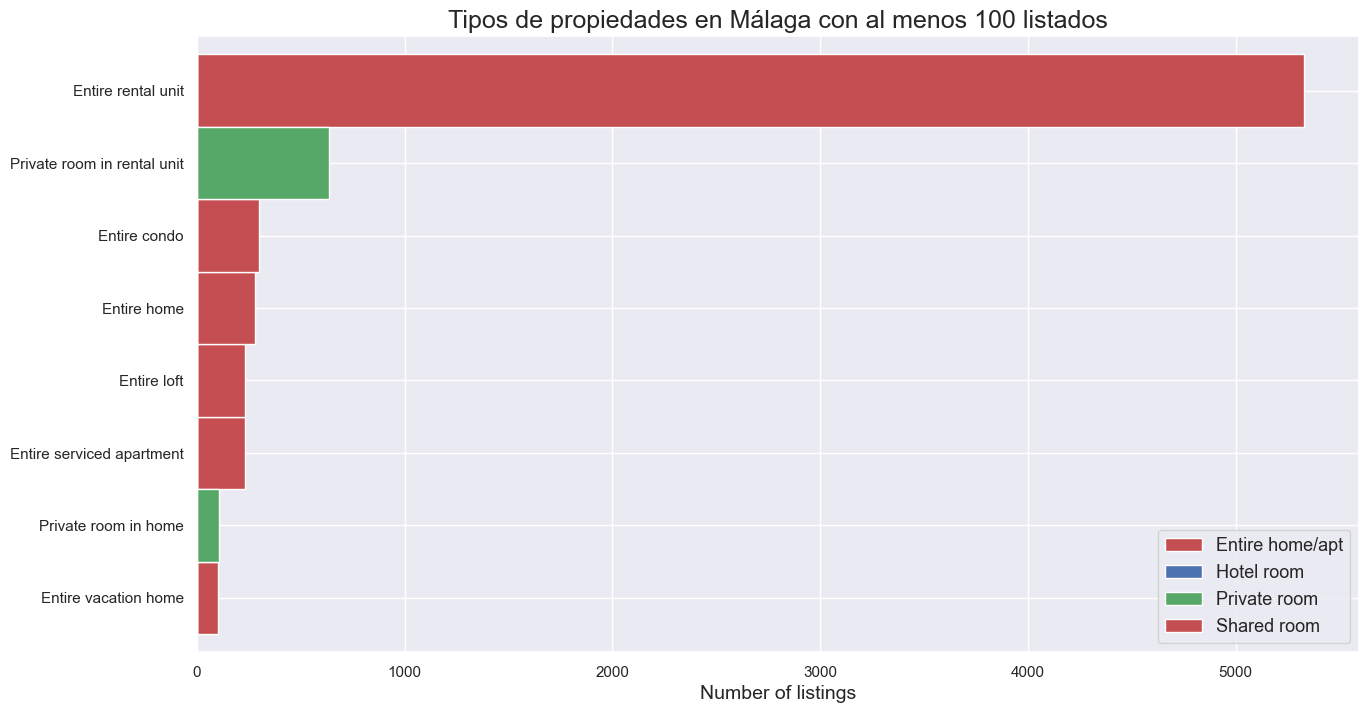

In [31]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Tipos de propiedades en Málaga con al menos 100 listados', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()


In [32]:
import plotly.express as px

prop_reset = prop.reset_index()
prop_melted = prop_reset.melt(id_vars='property_type', value_vars=prop.columns, var_name='room_type', value_name='count')

fig = px.bar(prop_melted, y='property_type', x='count', color='room_type', orientation='h',
             title='Tipos de propiedades en Málaga', height=800, width=1000)

fig.update_layout(xaxis_title='Number of listings',
                  yaxis_title='',
                  legend_title='Room Type',
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font=dict(size=13))

fig.show()

## 2.3 Número de alojados

La mayoría de los listados son para 4 personas, probablemente familias que escogen esta ciudad como destino vacacional. Además, Airbnb utiliza un máximo de 16 huéspedes por anuncio.

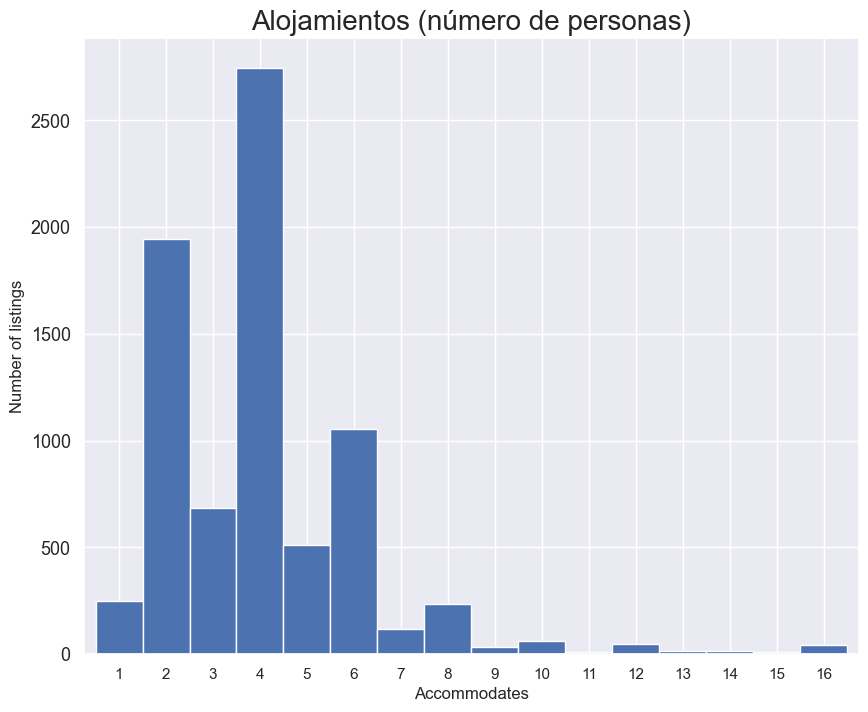

In [34]:
feq = listings['accommodates'].value_counts().sort_index()
feq=listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Alojamientos (número de personas)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

# 3. Analítica al servicio del gobierno

Crecimiento urbano de Málaga en el último siglo

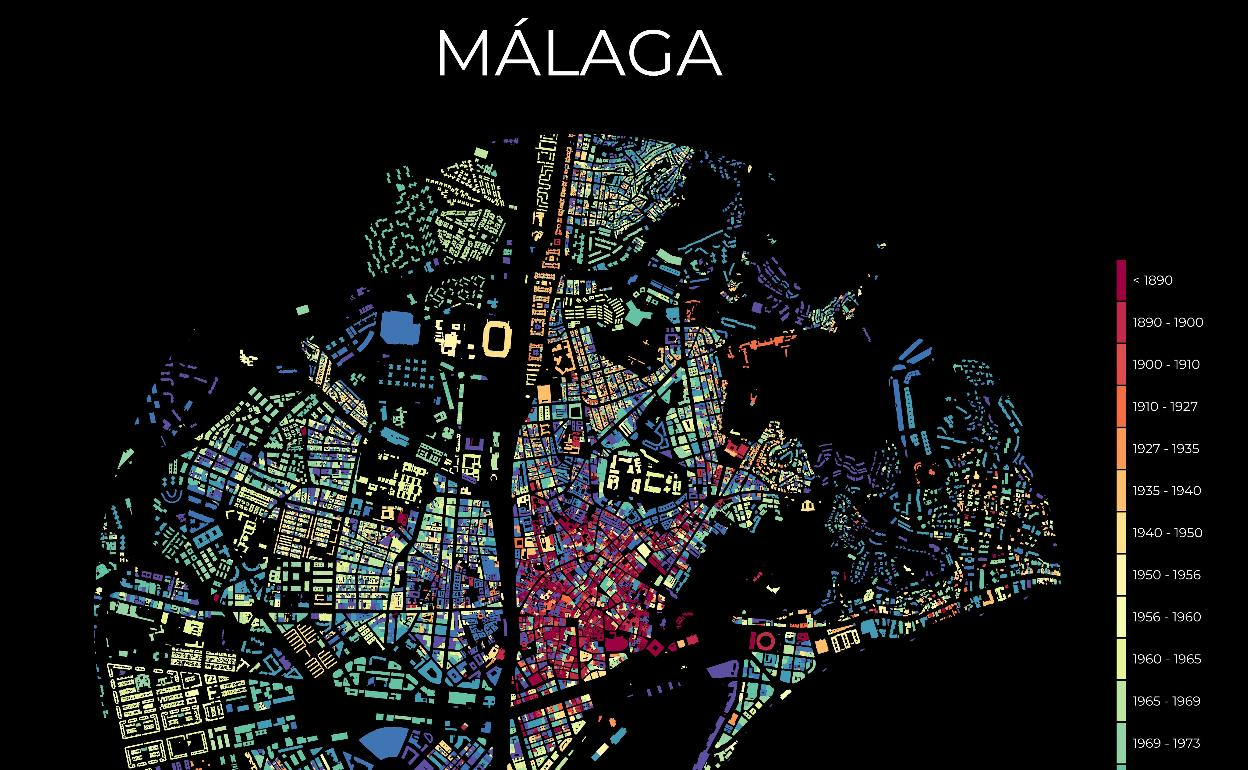

In [2]:
from IPython.display import Image, display
imagen_path_crecimiento_urbano = r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\CRECIMIENTO_URBANO_MALAGA_FUENTE-DIARIOSUR.ES.jpg'
display(Image(filename=imagen_path_crecimiento_urbano))

Grado de ocupación hotelera

In [35]:
from IPython.display import HTML

# Your iframe code as a string
iframe_code = """
<iframe id='ep-chart-a74334c8-876c-421d-92ae-a53c2ca35fe0-4282' src='https://embed.epdata.es/representacion/a74334c8-876c-421d-92ae-a53c2ca35fe0-4282/450' style='width: 100%; min-height: 450px; overflow: hidden;' frameborder='0' scrolling='no' height='450'></iframe>
"""

# Display the iframe in the notebook
display(HTML(iframe_code))

En el municipio de Málaga el número de plazas hoteleras ofertadas fue de 13.374 en 2023. En cuanto a los Airbnb, se ofertan 7.898, y gozan de una ocupación del 71%, que oscila entre el 58% de enero y el 81% de agosto.
https://www.epdata.es/datos/ocupacion-hotelera-hoteles-datos-graficos-municipios/143/malaga/4282
https://www.benoitproperties.com/es/news/exploring-the-airbnb-market-in-malaga-spain/

Bajo el lema "Málaga para vivir, no para sobrevivir", más de 25.000 manifestantes según la organización y 5.500 según datos de la Policía Nacional, se lanzaron a la calle para denunciar la complicada situación del mercado de la vivienda que afronta la capital malagueña, que sigue ocupando los primeros puestos en los rankings nacionales en cuanto a la escalada de precios, así como los procesos de turistificación que empezaron en el primer distrito de la capital y que se extienden ya hasta los barrios, con la proliferación de viviendas turísticas o la desaparición del comercio tradicional con la reconversión de locales comerciales.
https://www.eldia.es/economia/2024/06/29/airbnb-casas-vivir-malaga-movilizacion-derecho-vivienda-104539898.html

PROBLEMAS: Masificación vivienda turística (Málaga es el destino más buscado por los usuarios de Airbnb en 2023, https://www.elespanol.com/malaga/vivir/turismo/20230103/malaga-destino-buscado-usuarios-airbnb/730927002_0.html)
           Problemas de contaminación acústica derivados de Airbnb:
           La problemática de los ruidos en la ciudad de Málaga va directamente ligada al turismo y por ende a los alojamientos turísticos.
            Podemos observar como las quejas de la población a la policía por el ruido han ido en aumento año tras año, pasando de 11442 quejas en el año 2011 a 16497 en el año 2020, lo que supone un incremento de las quejas en un 30,6%.
            Les mostramos un gráfico en el cual se ve el aumento de las quejas de los vecinos en los últimos años:

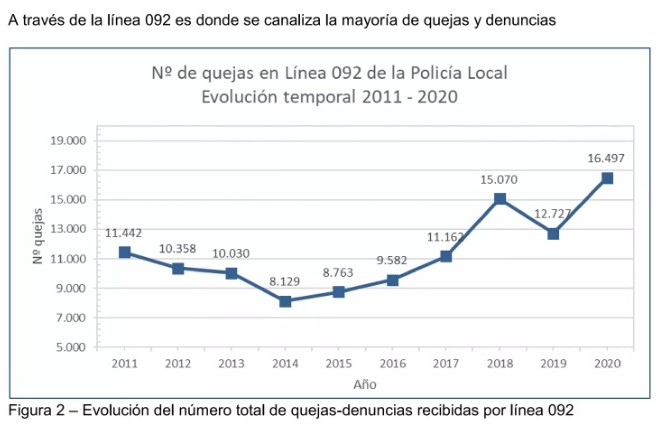

In [1]:
from IPython.display import Image, display
imagen_path_denuncias_vecinos_ruidos_2 = r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\DENUNCIAS VECINOS RUIDOS-2-FUENTE-TECHNI-ACUSTICA 1.jpg'
display(Image(filename=imagen_path_denuncias_vecinos_ruidos_2))

SOLUCIONES: Sumando ambos problemas, el Gobierno ha adoptado una serie de medidas entre las que está una nueva ordenanza que debe limitar la posibilidad de abrir nuevas viviendas turísticas en relación con la saturación del barrio en el que se encuentren, las viviendas deberan contar con una entrada independiente. https://www.malagahoy.es/malaga/ultimas-limitaciones-viviendas-turisticas-Malaga_0_1911109319.html

A esta última limitación, se suma que el consistorio está estudiando si puede acotar que los locales comerciales convertidos en vivienda deban estar "algo más de un año" en alquiler de larga estancia antes de ofertarse como turístico.

Otra posible solución que proponemos es el fomento de los hoteles por parte de las autoridades gubernamentales. Como vemos, los hoteles nunca llegan a estar ni al 80% de ocupación, con lo que se podrían adaptar a la demanda y movilizarla hacia el turismo hotelero (impuestos pigouvianos al Airbnb), bajando así la presión en el mercado de la vivienda y cualquier otro negocio, a la par que se reduciría la contaminación acústica.


# 4. Consejos al turismo

## 4.1. Precio medio por vecindario

Solo seleccionaremos el tipo de alojamiento más común, que es el alojamiento para 4 personas. El alojamiento en Carretera de Cádiz es el más caro.

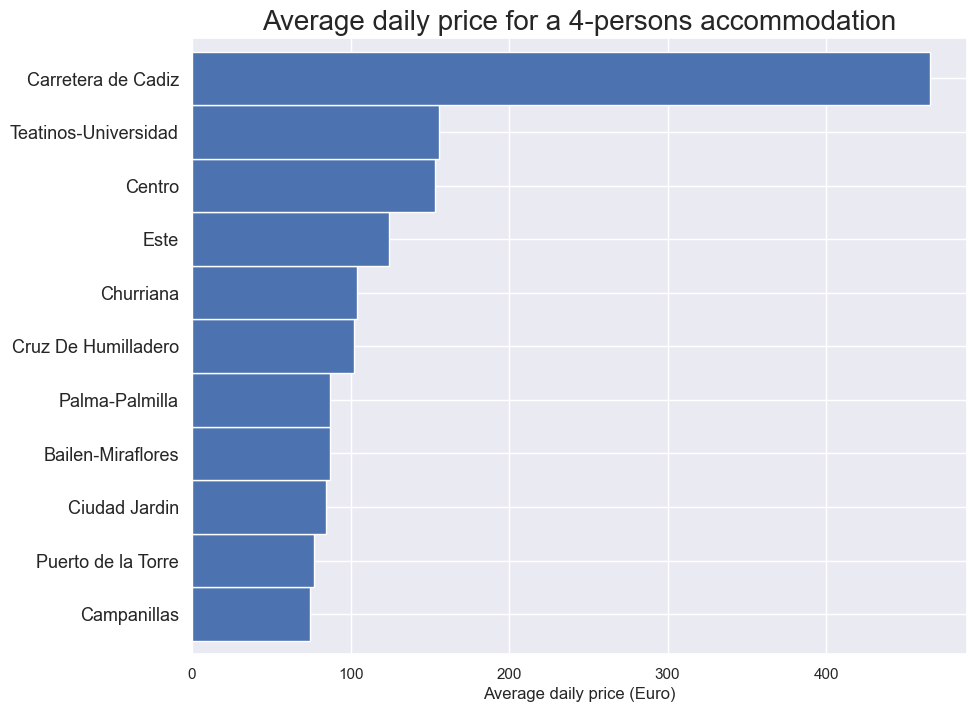

In [54]:
feq = listings[listings['accommodates']==4]
feq = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Precio medio diario para un alojamiento de cuatro personas", fontsize=20)
plt.xlabel('Precio medio diario (en €)', fontsize=12)
plt.ylabel("")
plt.show()

In [55]:
import plotly.express as px

feq_reset = feq.reset_index()

fig = px.bar(feq_reset, y='neighbourhood', x='price', orientation='h',
             title="Average daily price for a 4-persons accommodation",
             labels={'price': 'Average daily price (Euro)', 'neighbourhood': ''},
             height=800, width=1000,
             color='price',
             color_continuous_scale=[(0, 'blue'), (0.5, 'white'), (1, 'red')])

fig.show()

In [56]:
from IPython.display import display

# Asumiendo que 'feq_reset' es tu DataFrame
display(feq_reset)

,neighbourhood,price
0,Campanillas,74.333333
1,Puerto de la Torre,77.117647
2,Ciudad Jardin,84.727273
3,Bailen-Miraflores,86.828125
4,Palma-Palmilla,86.888889
5,Cruz De Humilladero,102.308511
6,Churriana,103.969697
7,Este,124.011364
8,Centro,153.505010
9,Teatinos-Universidad,155.692308


In [57]:
feq_reset

,neighbourhood,price
0,Campanillas,74.333333
1,Puerto de la Torre,77.117647
2,Ciudad Jardin,84.727273
3,Bailen-Miraflores,86.828125
4,Palma-Palmilla,86.888889
5,Cruz De Humilladero,102.308511
6,Churriana,103.969697
7,Este,124.011364
8,Centro,153.505010
9,Teatinos-Universidad,155.692308


In [58]:
feq_df

,Accommodates,Number of listings
0,Campanillas,39
1,Puerto de la Torre,46
2,Ciudad Jardin,64
3,Palma-Palmilla,64
4,Teatinos-Universidad,92
5,Churriana,125
6,Bailen-Miraflores,245
7,Cruz De Humilladero,353
8,Carretera de Cadiz,774
9,Este,792


In [59]:
feq

neighbourhood
Campanillas              74.333333
Puerto de la Torre       77.117647
Ciudad Jardin            84.727273
Bailen-Miraflores        86.828125
Palma-Palmilla           86.888889
Cruz De Humilladero     102.308511
Churriana               103.969697
Este                    124.011364
Centro                  153.505010
Teatinos-Universidad    155.692308
Carretera de Cadiz      465.689815
Name: price, dtype: float64

In [231]:
mal = gpd.read_file(r"C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\input\neighbourhoods.geojson")
feq = pd.DataFrame(feq)
feq = feq.transpose()
mal = pd.merge(mal, feq, on='neighbourhood', how='left')
mal.rename(columns={'price': 'average_price'}, inplace=True)
mal.average_price = mal.average_price.round(decimals=0)

map_dict = mal.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[36.72016, -4.42034], zoom_start=11)
folium.GeoJson(data=mal,
               name='Málaga',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 4.3. Review scores location, and location scores versus price

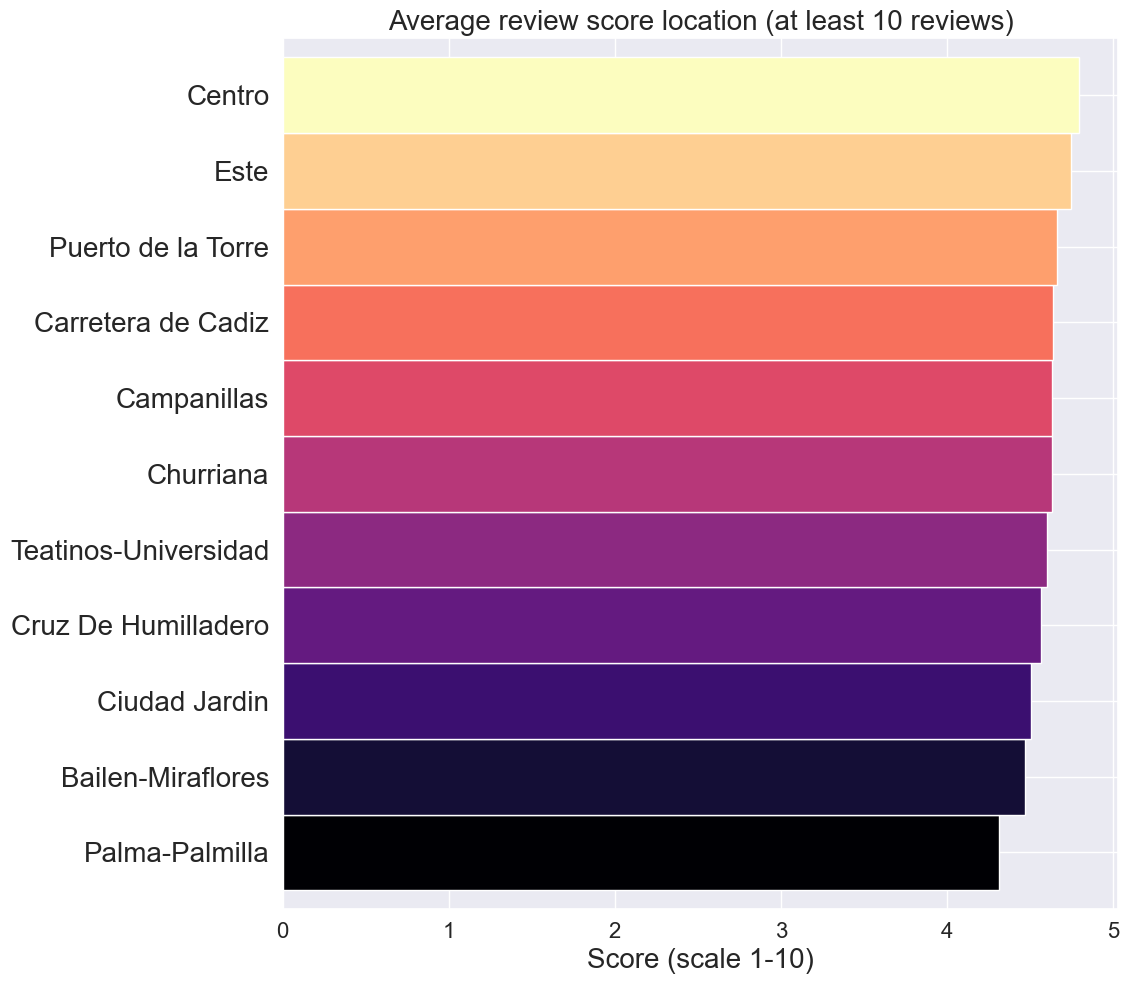

In [60]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

# Gráfico 1: Puntuación media de la ubicación
ax1 = fig.add_subplot(121)
feq = listings[listings['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
colors1 = plt.cm.magma(np.linspace(0, 1, len(feq1)))
ax1=feq1.plot.barh(color=colors1, width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()


In [61]:
from ipywidgets import widgets
def draw_price_chart(accommodates=4):
    filtered_data = listings[listings['accommodates'] == accommodates]
    
    average_price = filtered_data.groupby('neighbourhood')['price'].mean().sort_values()
    
    colors = plt.cm.magma(np.linspace(0, 1, len(average_price)))
    
    plt.figure(figsize=(10, 8))
    average_price.plot.barh(color=colors)
    plt.title(f"Average daily price for a {accommodates}-person accommodation", fontsize=15)
    plt.xlabel('Average daily price (Euro)', fontsize=12)
    plt.ylabel('Neighbourhood', fontsize=12)
accommodates_slider = widgets.IntSlider(value=4, min=1, max=10, step=1, description='Accommodates:')
widgets.interact(draw_price_chart, accommodates=accommodates_slider)


interactive(children=(IntSlider(value=4, description='Accommodates:', max=10, min=1), Output()), _dom_classes=…

<function __main__.draw_price_chart(accommodates=4)>

## 4.4 Cómo usar las puntuaciones de las opiniones

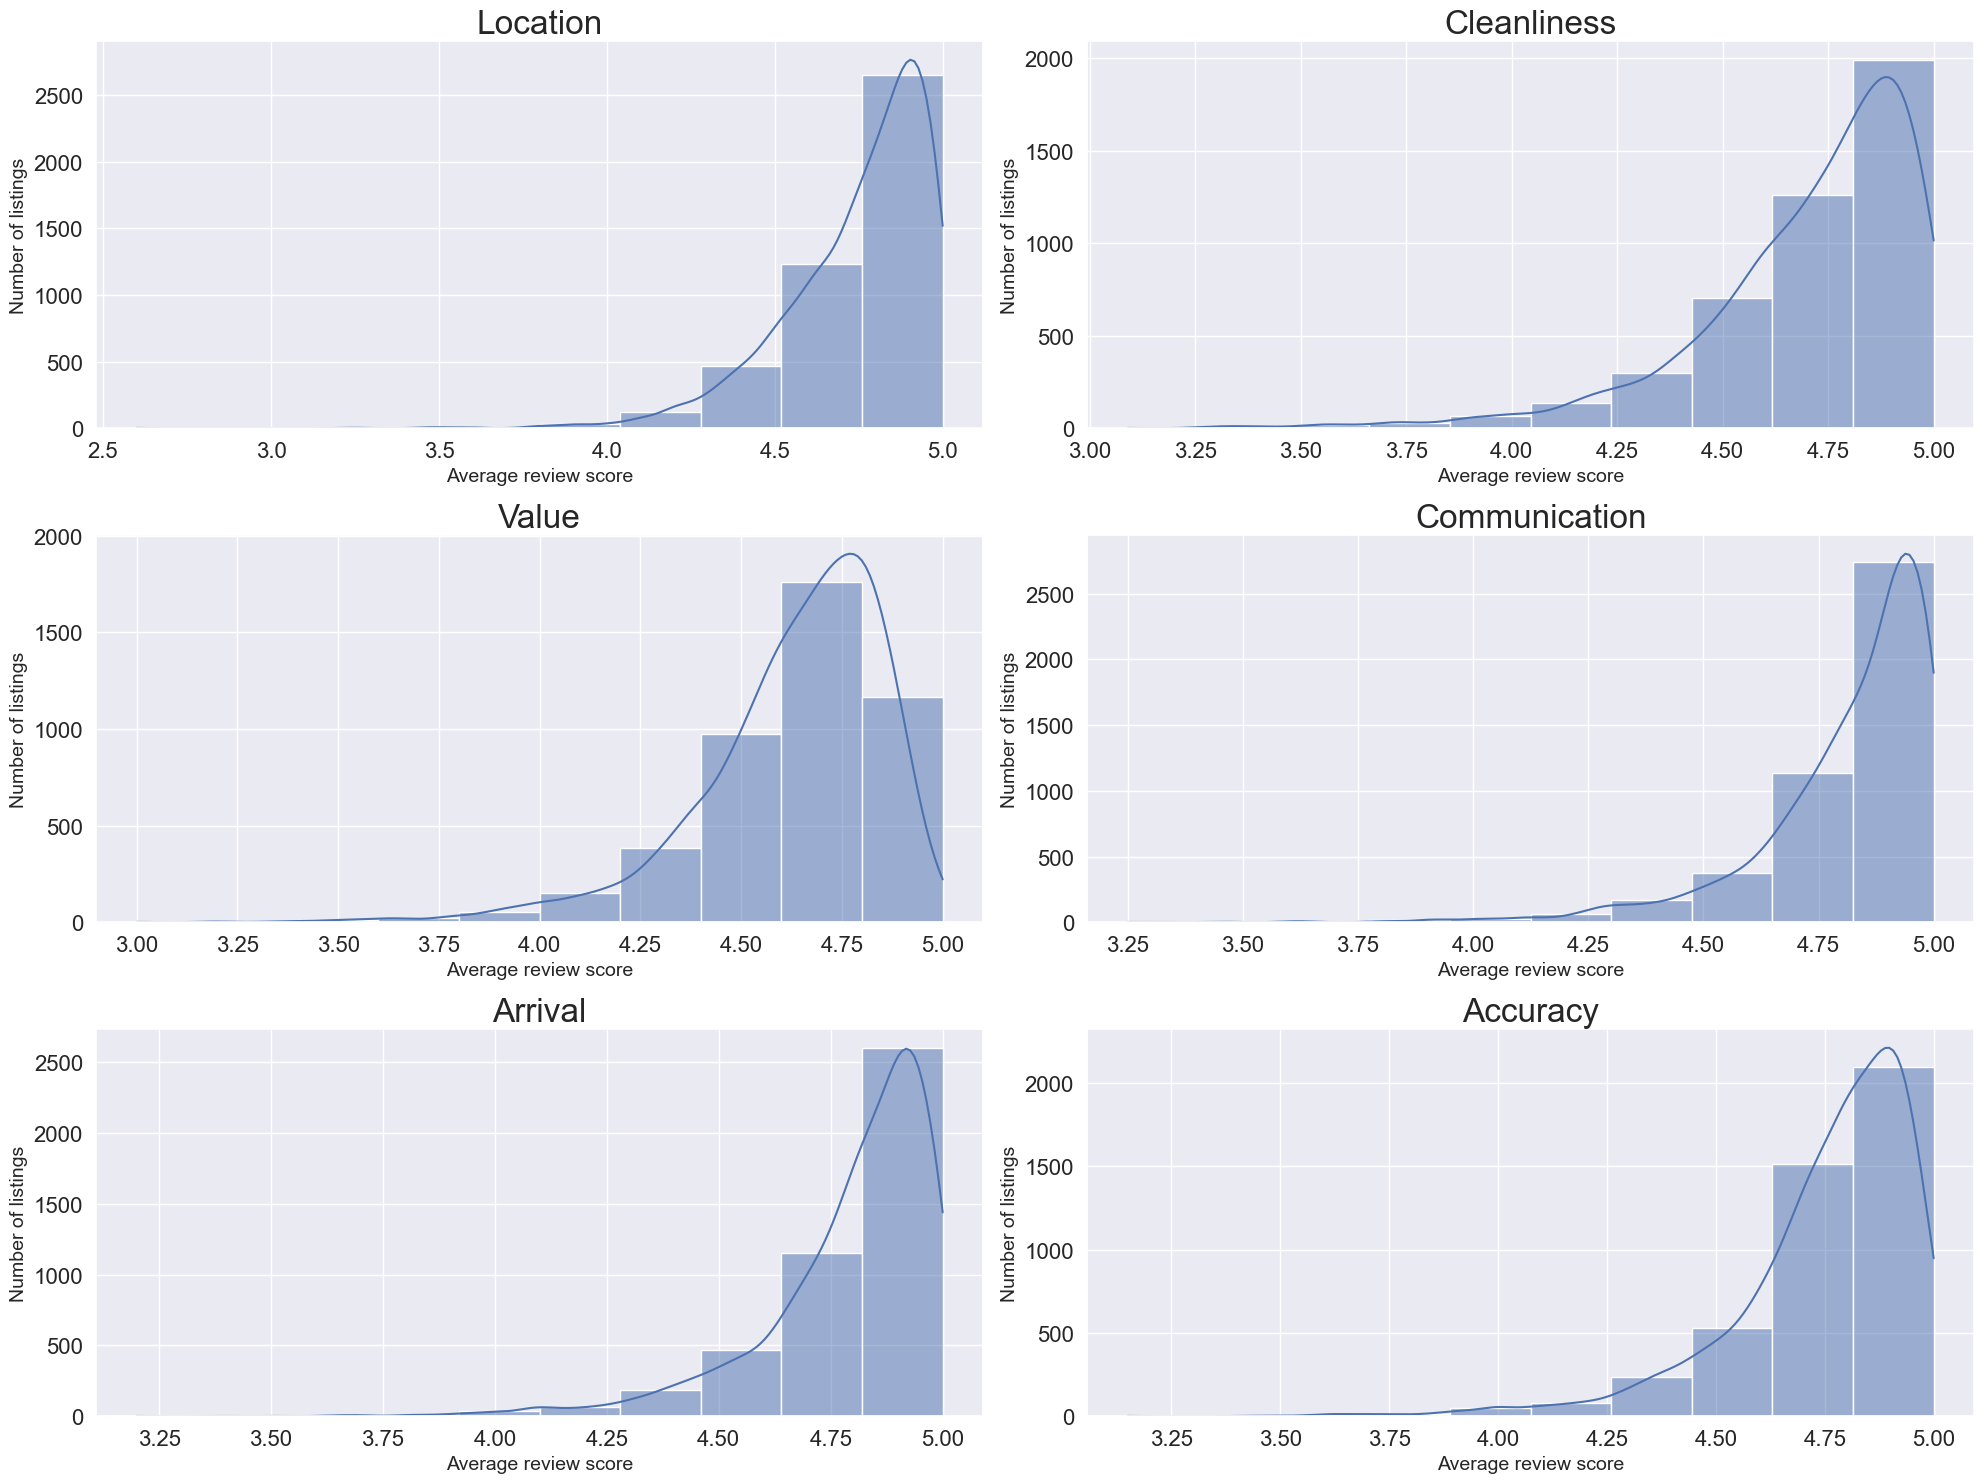

In [100]:
listings10 = listings[listings['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

# Location
ax1 = fig.add_subplot(321)
sns.histplot(data=listings10, x='review_scores_location', color='b', bins=10, kde=True, ax=ax1)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# Cleanliness
ax2 = fig.add_subplot(322)
sns.histplot(data=listings10, x='review_scores_cleanliness', color='b', bins=10, kde=True, ax=ax2)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# Value
ax3 = fig.add_subplot(323)
sns.histplot(data=listings10, x='review_scores_value', color='b', bins=10, kde=True, ax=ax3)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# Communication
ax4 = fig.add_subplot(324)
sns.histplot(data=listings10, x='review_scores_communication', color='b', bins=10, kde=True, ax=ax4)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# Check-in
ax5 = fig.add_subplot(325)
sns.histplot(data=listings10, x='review_scores_checkin', color='b', bins=10, kde=True, ax=ax5)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

# Accuracy
ax6 = fig.add_subplot(326)
sns.histplot(data=listings10, x='review_scores_accuracy', color='b', bins=10, kde=True, ax=ax6)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()



## 4.5 Encontrando un buen hospedador

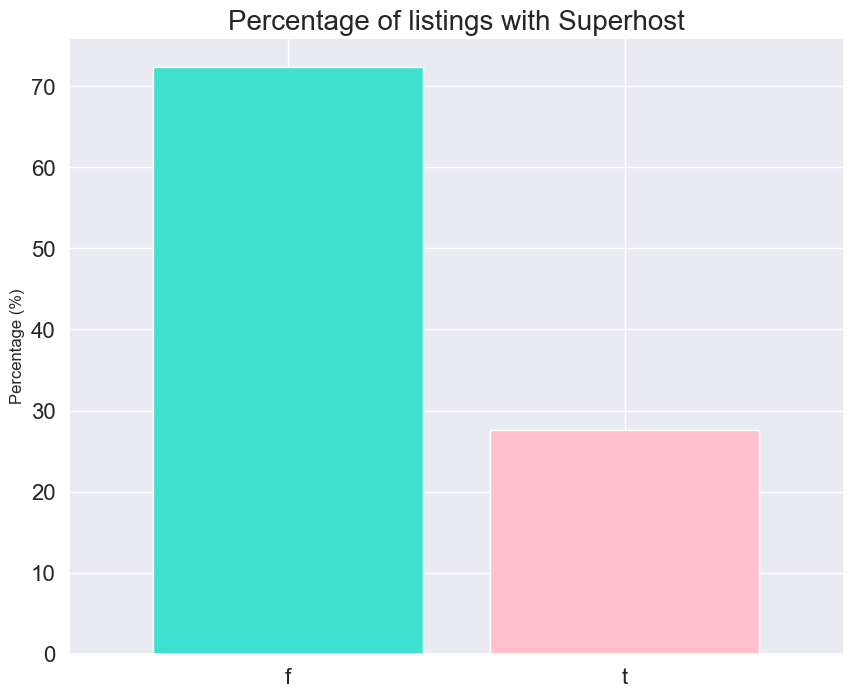

In [63]:
feq_percent = listings['host_is_superhost'].value_counts(normalize=True) * 100

feq_percent.plot.bar(figsize=(10, 8), width=0.8, rot=0, color=['blue', 'orange'])

feq_percent.plot.bar(figsize=(10, 8), width=0.8, rot=0, color=['turquoise', 'pink'])

plt.title("Percentage of listings with Superhost", fontsize=20)
plt.ylabel('Percentage (%)', fontsize=12)

plt.show()

In [64]:
counts = listings.groupby(['neighbourhood', 'host_is_superhost']).size().unstack(fill_value=0)

counts['percentage'] = (counts['t'] / (counts['t'] + counts['f'])) * 100

counts_reset = counts.reset_index()

fig = px.bar(counts_reset, x='neighbourhood', y='percentage',
             title="Percentage of Superhosts by Neighbourhood",
             labels={'percentage': 'Percentage of Superhosts', 'neighbourhood': 'Neighbourhood'},
             color='percentage',  # Usa el porcentaje para el color de las barras
             color_continuous_scale=px.colors.sequential.Magma)  # Escala de color

fig.update_layout(xaxis_title="Neighbourhood",
                  yaxis_title="Percentage of Superhosts",
                  coloraxis_colorbar=dict(title="Percentage"))

fig.show()

C:\Users\lucia\AppData\Local\Temp\ipykernel_7720\1006693266.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



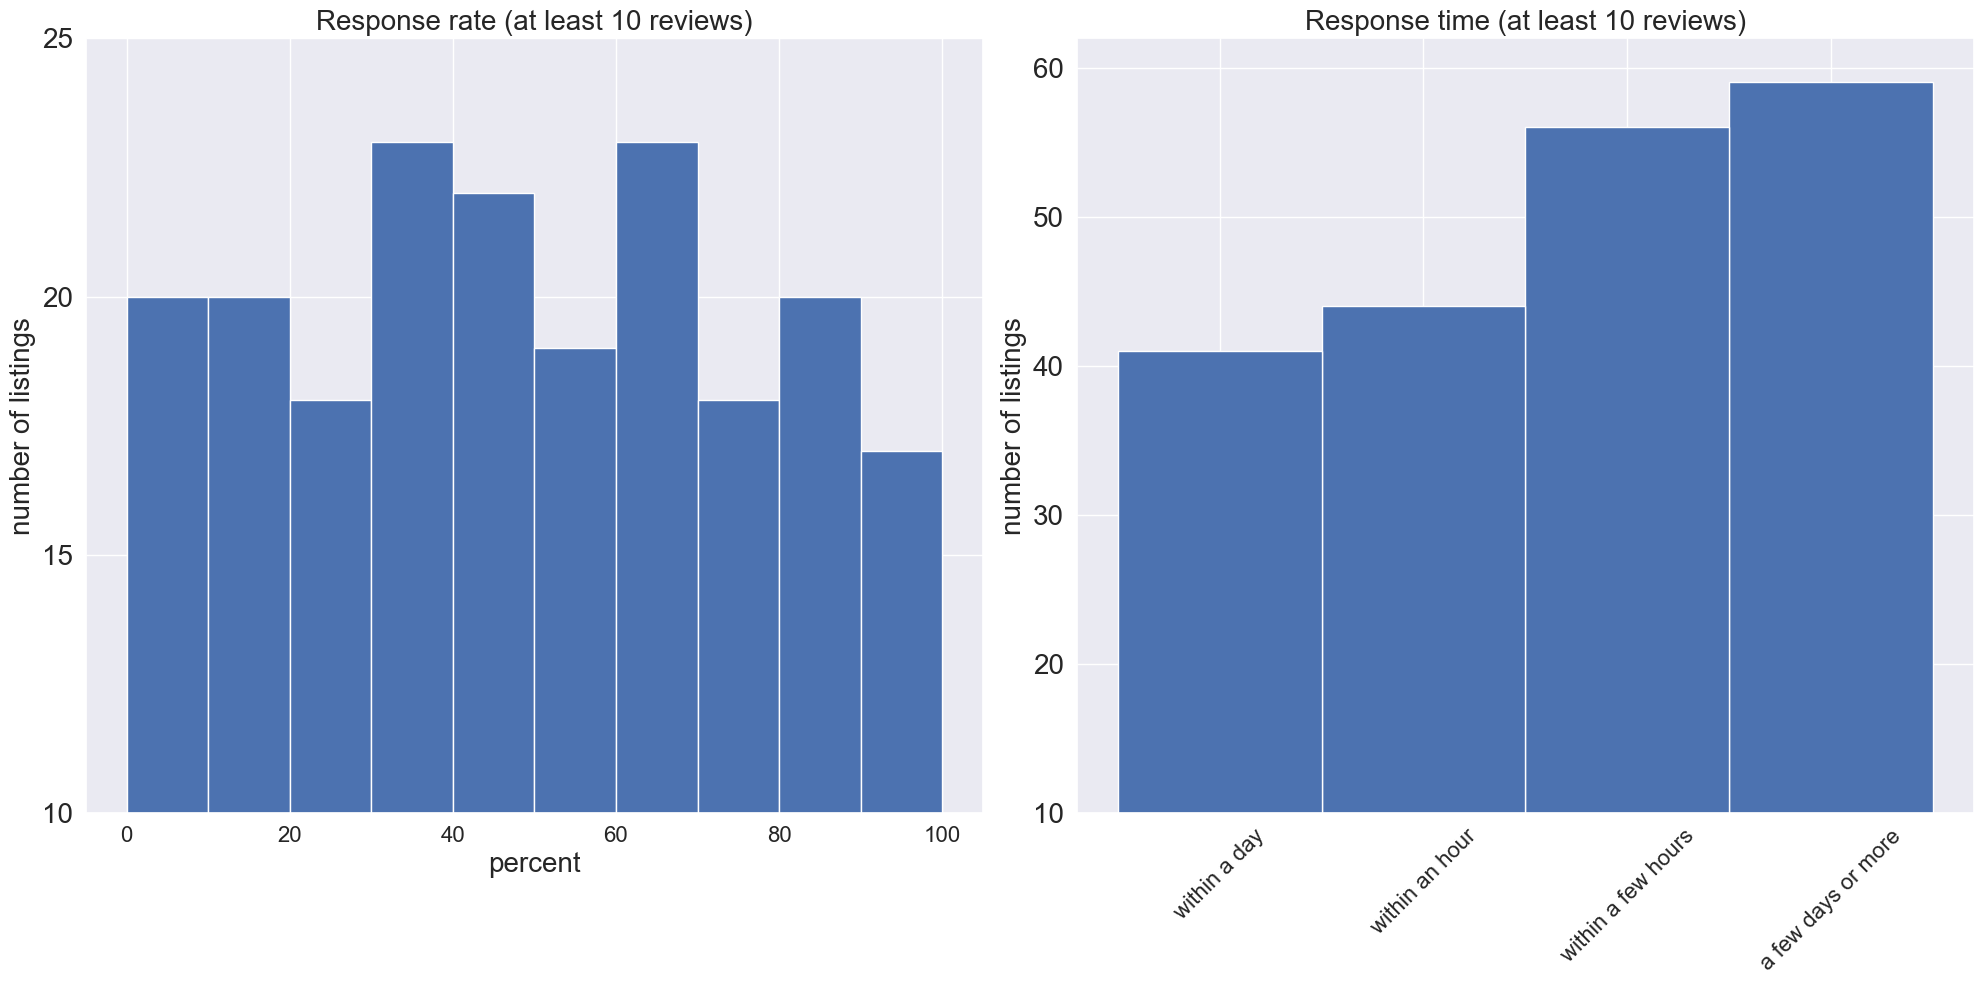

In [65]:
np.random.seed(0)
listings10 = pd.DataFrame({
    'host_response_rate': np.random.randint(0, 101, 200),
    'host_response_time': np.random.choice(['within an hour', 'within a few hours', 'within a day', 'a few days or more'], 200)
})

fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

# Primer gráfico
ax1 = fig.add_subplot(121)
feq1 = listings10['host_response_rate'].dropna()
ax1.hist(feq1)
ax1.set_title("Response rate (at least 10 reviews)", fontsize=20)
ax1.set_ylabel("number of listings", fontsize=20)
ax1.set_xlabel("percent", fontsize=20)
ax1.set_ylim(10, 25) 
ax1.set_yticks(np.arange(10, 26, 5)) 

# Segundo gráfico
ax2 = fig.add_subplot(122)
feq2 = listings10['host_response_time'].value_counts()
ax2.bar(feq2.index, feq2.values, color='b', width=1)
ax2.set_title("Response time (at least 10 reviews)", fontsize=20)
ax2.set_ylabel("number of listings", fontsize=20)
ax2.set_xticklabels(feq2.index, rotation=45)
ax2.invert_xaxis()  
ax2.set_ylim(bottom=10)  

plt.tight_layout()
plt.show()

## 4.6 Disponibilidad en el tiempo


In [66]:
calendar= pd.read_csv(r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\input\calendar.csv')
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar = calendar[calendar.date < '2024-12-31']

In [67]:
print(calendar.shape)

(2840795, 7)


In [68]:
listings.index.name = "listing_id"
calendar = pd.merge(calendar, listings[['accommodates']], on = "listing_id", how = "left")
calendar.sample(15)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,accommodates
308964,18851007,2024-06-22,t,45.0,NaN,4,1125,NaN
2124568,840499133515077010,2024-09-24,f,36.0,NaN,2,1125,NaN
270075,17725711,2024-12-05,f,70.0,NaN,4,1125,NaN
1543633,601227946507112870,2024-02-17,t,93.0,NaN,4,1125,NaN
1760995,678975101552825979,2024-08-22,t,55.0,NaN,4,365,NaN
2006713,795624758920892765,2024-11-03,t,80.0,NaN,3,365,NaN
1053451,45459848,2024-03-01,t,79.0,NaN,4,1125,NaN
1784448,684516789010906447,2024-11-23,f,81.0,NaN,1,999,NaN
1923298,760655483878924521,2024-04-22,t,89.0,NaN,2,365,NaN
2302899,899010890138355817,2024-04-23,f,118.0,NaN,1,365,NaN


# 5. Minería de texto con las _reviews_

In [84]:
detailed_reviews= pd.read_csv(r'C:\Users\lucia\Desktop\UPGRADE_works\Entrega_3\input\detailed_reviews.csv')
detailed_reviews.shape

(333965, 6)

In [85]:
detailed_reviews = pd.merge(detailed_reviews, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
detailed_reviews = detailed_reviews.set_index('id')
detailed_reviews = detailed_reviews[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
detailed_reviews.head()

,listing_id,name,host_id,host_name,date,reviewer_id,reviewer_name,comments
id,,,,,,,,
8152056,96033,NaN,NaN,NaN,2013-10-18,366364,Vera,My stay at the apartment of Adriana and Rafa w...
8689156,96033,NaN,NaN,NaN,2013-11-12,4862098,Sarah,The flat was perfect for our holiday in Malaga...
11862773,96033,NaN,NaN,NaN,2014-04-17,2236416,Galina,El piso esta muy lindo y comido :) No había in...
3929832,634046,NaN,NaN,NaN,2013-03-28,5111080,Jeff,Fede made our first experience with airbnb a p...
3965903,634046,NaN,NaN,NaN,2013-03-31,5482987,Anthony,Great apartment in a good location to the beac...


In [86]:
host_reviews = detailed_reviews.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
from IPython.display import display
display(host_reviews.head(5))

,,number_of_reviews
host_id,host_name,


In [87]:
detailed_reviews.comments.head()

id
8152056     My stay at the apartment of Adriana and Rafa w...
8689156     The flat was perfect for our holiday in Malaga...
11862773    El piso esta muy lindo y comido :) No había in...
3929832     Fede made our first experience with airbnb a p...
3965903     Great apartment in a good location to the beac...
Name: comments, dtype: object

In [89]:
detailed_reviews.comments.values[4]

'Great apartment in a good location to the beach.  Parking was not a problem.  Apartment had adequate accessories from pots and pans to a toaster.  A coffee machine would be nice.  Washing machine was used several times but temperatures made it difficult to dry laundry.  A laundry dryer for long stays would be helpful.  Beds were comfortable and all electrical items worked.  Great family apartment.  Fede was very helpful and easy to communicate with.  Overall a very good apartment for the price.  Thanks Fede!!'

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
#take out empty comments (530)
detailed_reviews = detailed_reviews[detailed_reviews['comments'].notnull()]

#remove numbers
detailed_reviews['comments'] = detailed_reviews['comments'].str.replace('\d+', '') 
#all to lowercase
detailed_reviews['comments'] = detailed_reviews['comments'].str.lower()
#remove windows new line
detailed_reviews['comments'] = detailed_reviews['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
detailed_reviews['comments'] = detailed_reviews['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
detailed_reviews['comments'] = detailed_reviews['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
detailed_reviews['comments'] = detailed_reviews['comments'].str.replace('\s+', ' ')

detailed_reviews.comments.values[4] #print same comments again

'great apartment good location beach parking problem apartment adequate accessories pots pans toaster coffee machine would nice washing machine used several times temperatures made difficult dry laundry laundry dryer long stays would helpful beds comfortable electrical items worked great family apartment fede helpful easy communicate with overall good apartment price thanks fede '

In [92]:
from sklearn.feature_extraction.text import CountVectorizer

texts = detailed_reviews.comments.tolist()

vec = CountVectorizer(token_pattern=r'\b\w{5,}\b').fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns=['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

,words,counts
0,apartment,106404
2,great,90080
3,location,71357
16,malaga,65921
30,place,61545
106,clean,52801
34,everything,42622
27,would,36180
29,recommend,34701
94,appartement,34175


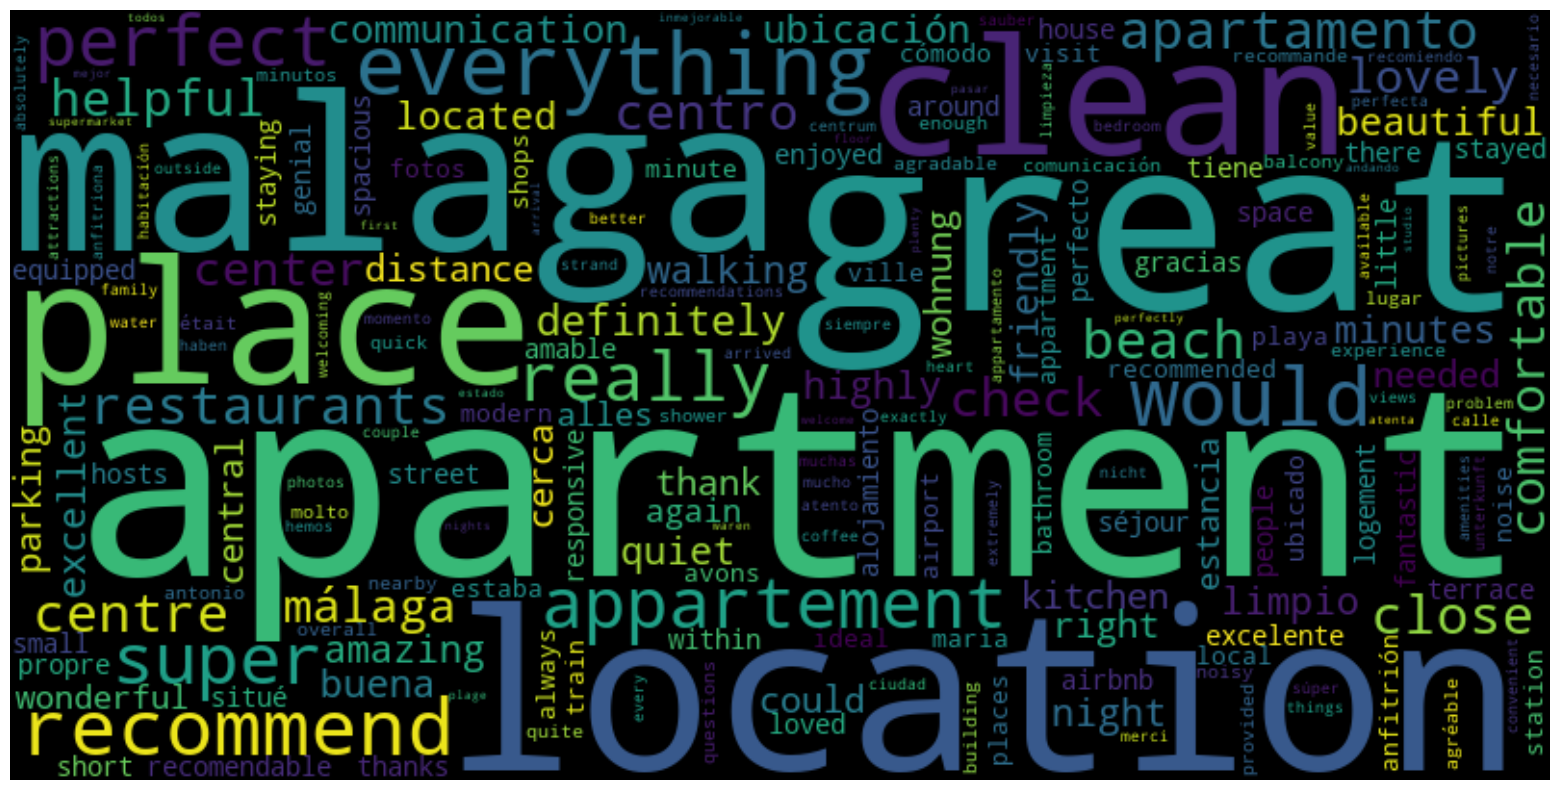

In [93]:
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()